Load and add information in SRA metadata

In [10]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)


In [11]:
csv_file = '../data/citrus_with_pmid.csv'
organism_keyword = 'CITRUS'

In [12]:
df = pd.read_csv(csv_file,
                 header = 0,
                 low_memory=False)

In [13]:
df.columns

Index(['Run', 'Assay Type', 'AvgSpotLen', 'Bases', 'BioSample', 'Bytes',
       'Center Name', 'Consent', 'DATASTORE filetype', 'DATASTORE provider',
       ...
       'samp_salinity', 'size_frac',
       'geographic_location_(region_and_locality)', 'growth_protocol',
       'insert_size_n (exp)', 'insert_size_n (run)', 'PMIDs', 'PMID_count',
       'Primary_PMID', 'PMID_source'],
      dtype='object', length=151)

In [14]:
df.shape

(5998, 151)

#### Exploratory Analysis

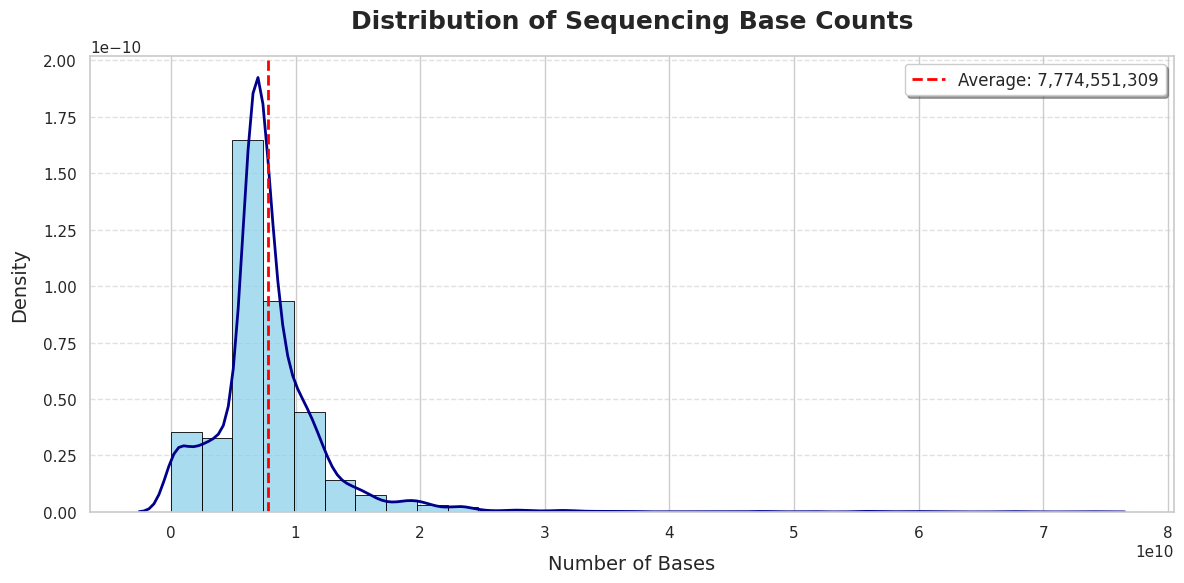

In [15]:
# BASES LENGTH
# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Histogram normalized to density
sns.histplot(df['Bases'], bins=30, stat="density", 
             color="skyblue", edgecolor="black", linewidth=0.6, alpha=0.7)

# KDE curve
sns.kdeplot(df['Bases'], color="darkblue", linewidth=2)

# Average line
average_bases = df['Bases'].mean()
plt.axvline(average_bases, color='red', linestyle='--', linewidth=2, 
            label=f'Average: {average_bases:,.0f}')

# Titles and labels
plt.title('Distribution of Sequencing Base Counts', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of Bases', fontsize=14, labelpad=10)
plt.ylabel('Density', fontsize=14, labelpad=10)

# Format x-axis in scientific notation
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on y-axis
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Legend
plt.legend(fontsize=12, frameon=True, shadow=True, loc="upper right")

plt.tight_layout()
plt.show()



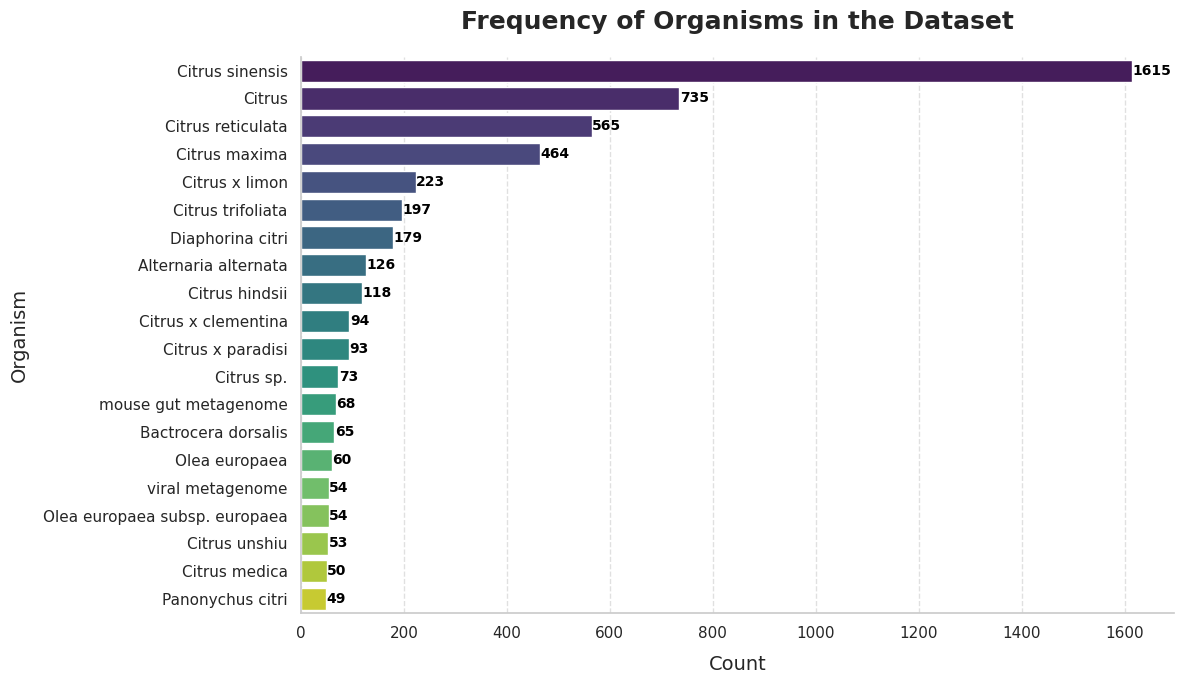

In [27]:
# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

# Order top 20 organisms
top_organisms = df['Organism'].value_counts().index[:20]

# Count plot with gradient palette
ax = sns.countplot(
    data=df, 
    y='Organism', 
    order=top_organisms, 
    palette=sns.color_palette("viridis", n_colors=20)
)

# Add value labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, 
            f'{int(width)}', 
            va='center', fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Frequency of Organisms in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Organism', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()


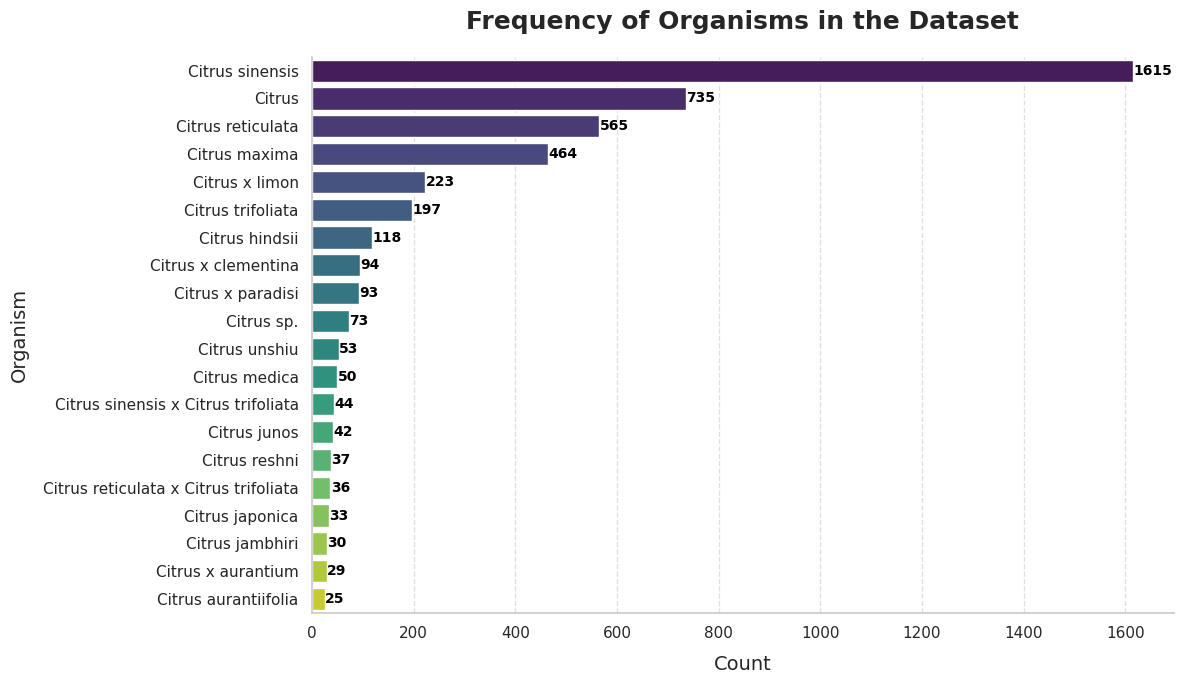

In [28]:
# Now, remove the Organisms different of the 'CITRUS' (or other keyword)
filtered_df = df[df['Organism'].str.contains(organism_keyword, case=False, na=False, regex=True)]

# Set style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 7))

# Order top 20 organisms
top_organisms = filtered_df['Organism'].value_counts().index[:20]

# Count plot with gradient palette
ax = sns.countplot(
    data=filtered_df, 
    y='Organism', 
    order=top_organisms, 
    palette=sns.color_palette("viridis", n_colors=20)
)

# Add value labels
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height() / 2, 
            f'{int(width)}', 
            va='center', fontsize=10, fontweight='bold', color='black')

# Titles and labels
plt.title('Frequency of Organisms in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Organism', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Remove top and right spines for a cleaner look
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

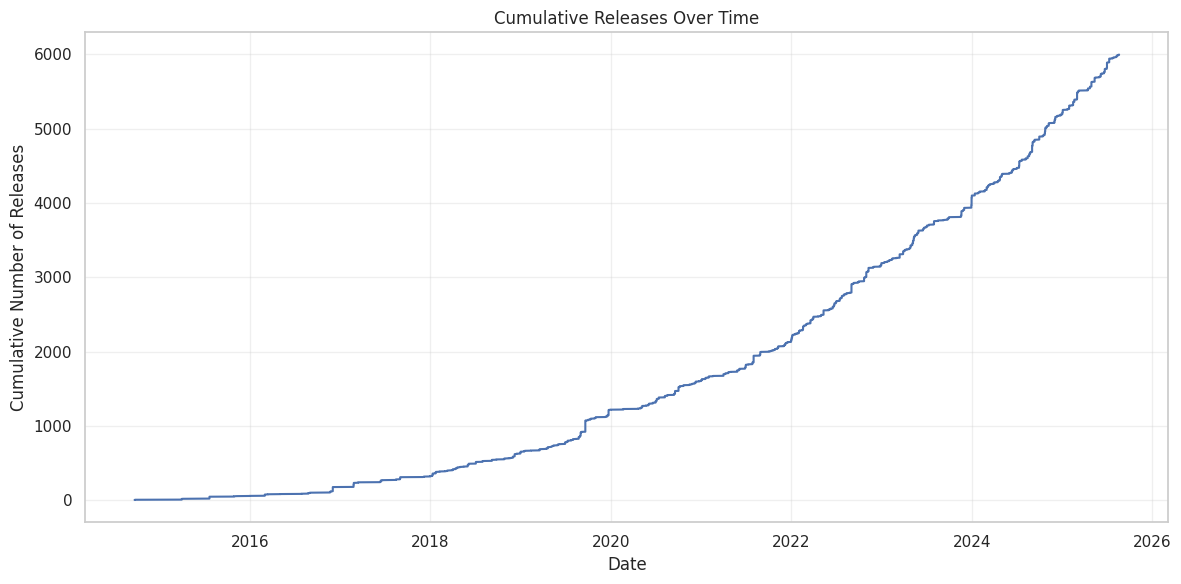

In [18]:
# Release data time series
# Convert and sort by date
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df_sorted = df.sort_values('ReleaseDate')

# Create cumulative count
df_sorted['Cumulative_Releases'] = range(1, len(df_sorted) + 1)

plt.figure(figsize=(12, 6))
plt.plot(df_sorted['ReleaseDate'], df_sorted['Cumulative_Releases'])
plt.title('Cumulative Releases Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Number of Releases')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/tmp/ipykernel_14077/1722362917.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['YearMonth'] = df['ReleaseDate'].dt.to_period('M')


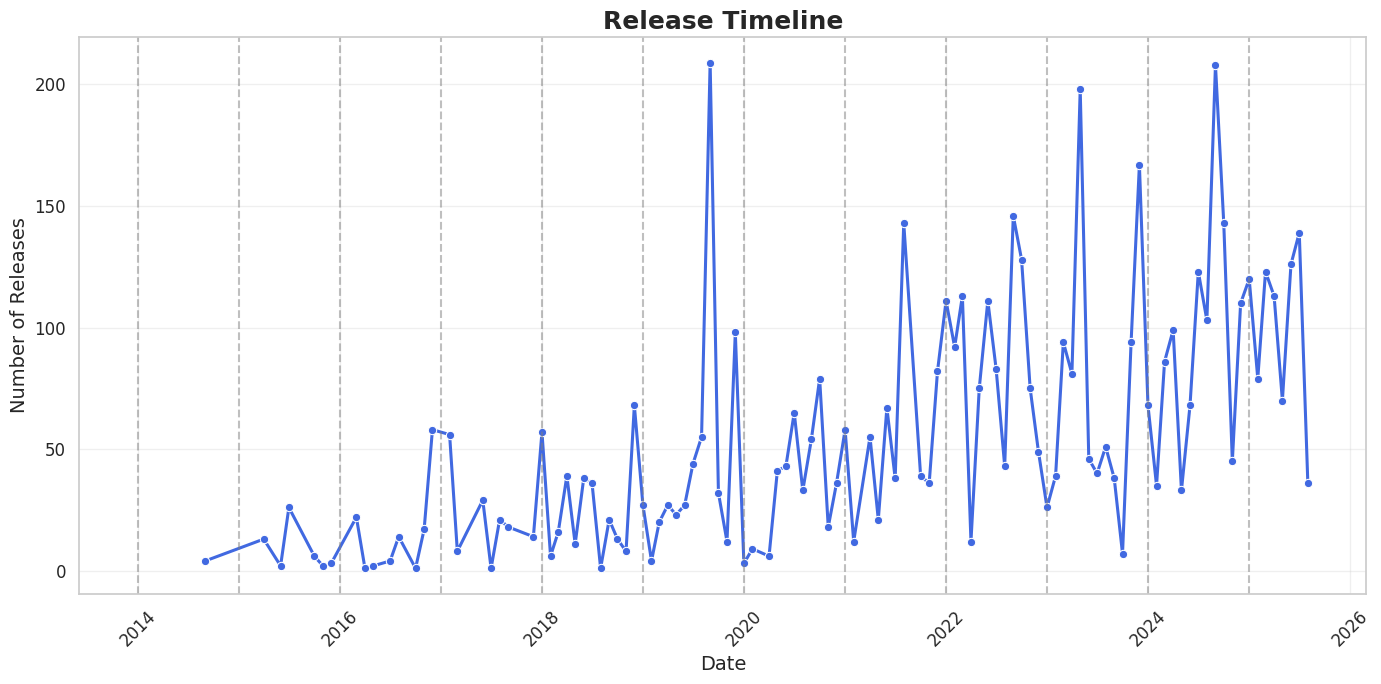

In [26]:
# Convert to datetime and extract month-year
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df['YearMonth'] = df['ReleaseDate'].dt.to_period('M')

# Count by month
monthly_data = df.groupby('YearMonth').size().reset_index(name='Count')
monthly_data['YearMonth'] = monthly_data['YearMonth'].dt.to_timestamp()

# Plot
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=monthly_data, 
    x='YearMonth', 
    y='Count', 
    marker='o', 
    linewidth=2.2, 
    color='royalblue'
)

# Add vertical dotted lines at the start of each year
years = monthly_data['YearMonth'].dt.year.unique()
for year in years:
    plt.axvline(
        pd.Timestamp(f'{year}-01-01'), 
        color='gray', 
        linestyle='--', 
        alpha=0.5
    )

# Beautify
plt.title('Release Timeline', fontsize=18, weight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Releases', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

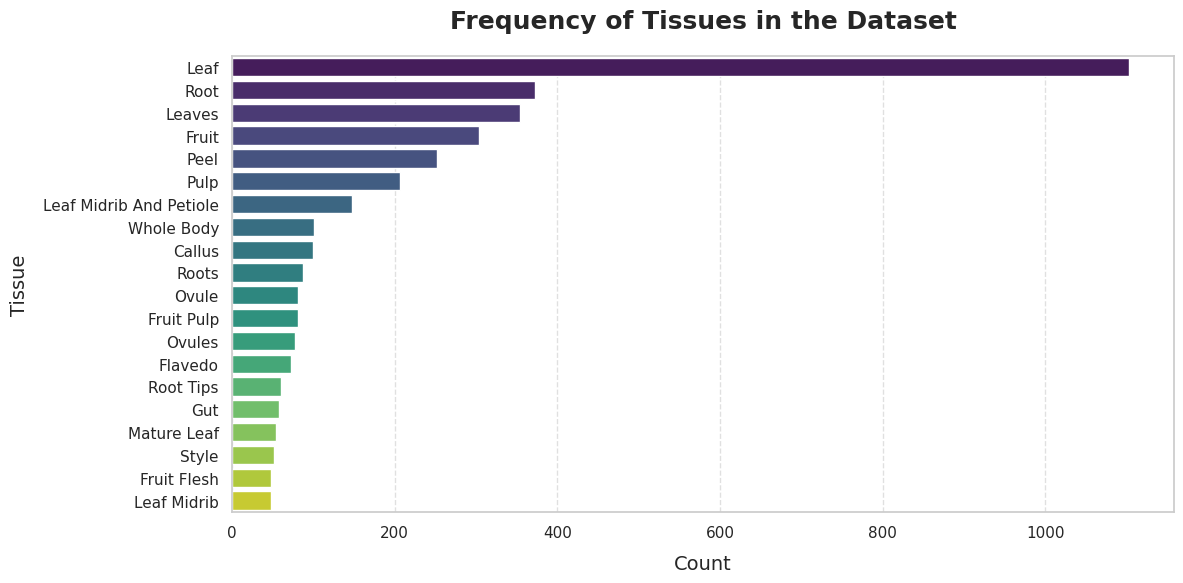

In [20]:

# Tissue Frequency - Only the 20 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Normalize the 'tissue' column by stripping whitespace and converting to lowercase
df['tissue'] = df['tissue'].str.strip().str.lower()
df['tissue'] = df['tissue'].str.title()

# Count plot for tissue frequency
sns.countplot(data=df, y='tissue', order=df['tissue'].value_counts().index[:20], palette='viridis')

# Titles and labels
plt.title('Frequency of Tissues in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Tissue', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

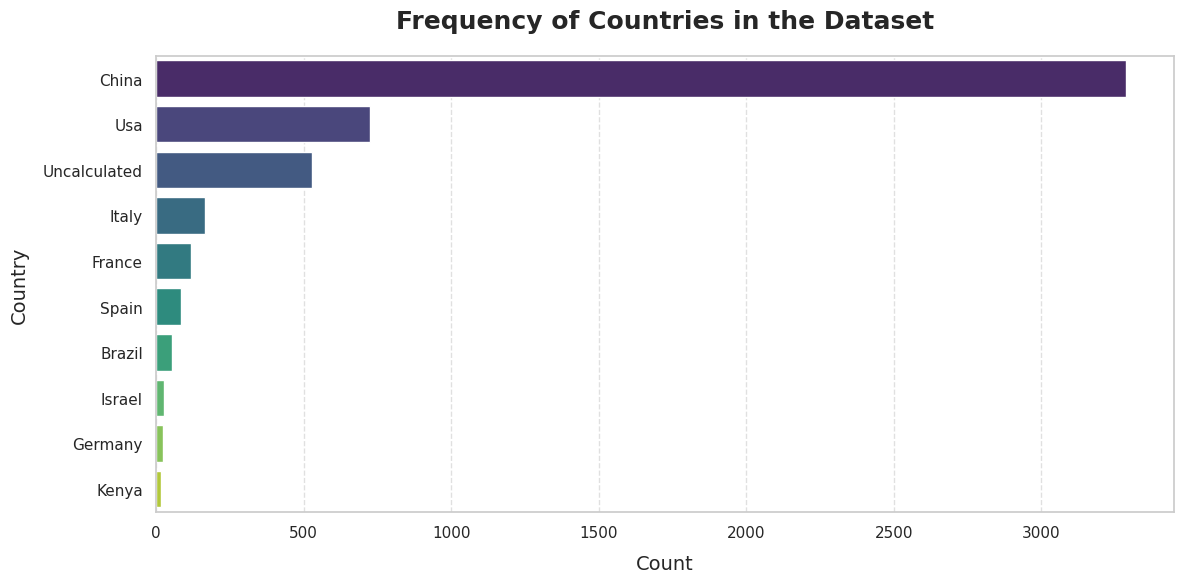

In [21]:
# Country Name Frequency - Only the 10 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Normalize the 'geo_loc_name_country' column by stripping whitespace and converting to lowercase
df['geo_loc_name_country'] = df['geo_loc_name_country'].str.strip().str.lower()
df['geo_loc_name_country'] = df['geo_loc_name_country'].str.title()

# Count plot for country frequency
sns.countplot(data=df, y='geo_loc_name_country', order=df['geo_loc_name_country'].value_counts().index[:10], palette='viridis')

# Titles and labels
plt.title('Frequency of Countries in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Country', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

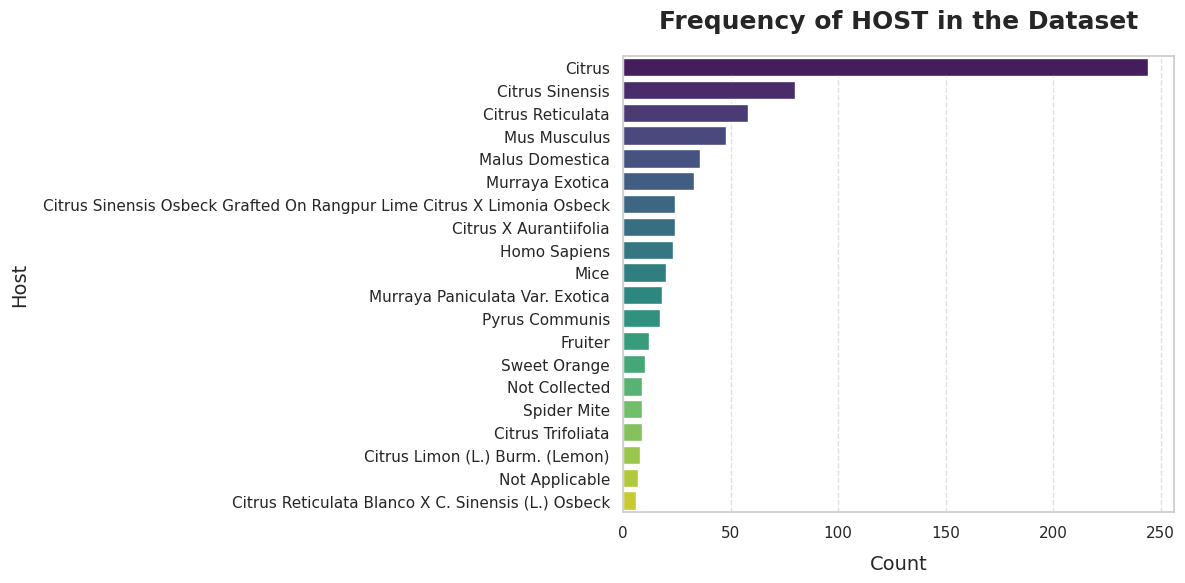

In [22]:
# HOST Name Frequency - Only the 20 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Normalize the 'HOST' column by stripping whitespace and converting to uppercase
df['HOST'] = df['HOST'].str.strip().str.upper()
# Maing only the first word uppercase
df['HOST'] = df['HOST'].str.title()

# Count plot for host frequency
sns.countplot(data=df, y='HOST', order=df['HOST'].value_counts().index[:20], palette='viridis')

# Titles and labels
plt.title('Frequency of HOST in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Host', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


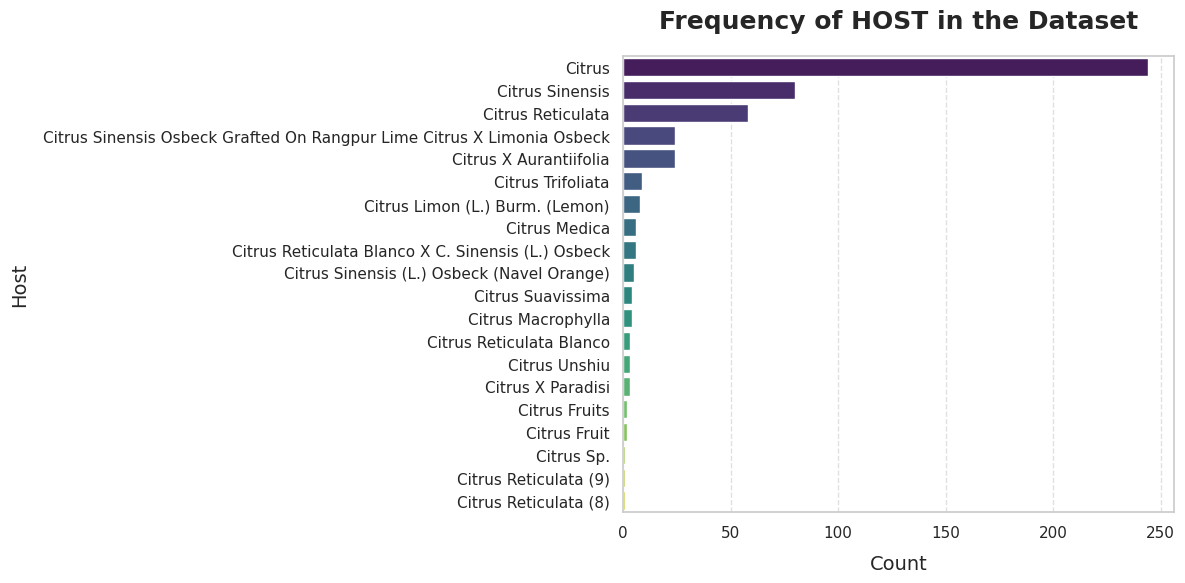

In [23]:
# Only HOST with keyword
filtered_df = df[df['HOST'].str.contains(organism_keyword, case=False, na=False, regex=True)]

# Organisms Frequency - Only the 20 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# Count plot for organism frequency
sns.countplot(data=filtered_df, y='HOST', order=filtered_df['HOST'].value_counts().index[:20], palette='viridis')

# Titles and labels
plt.title('Frequency of HOST in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Host', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

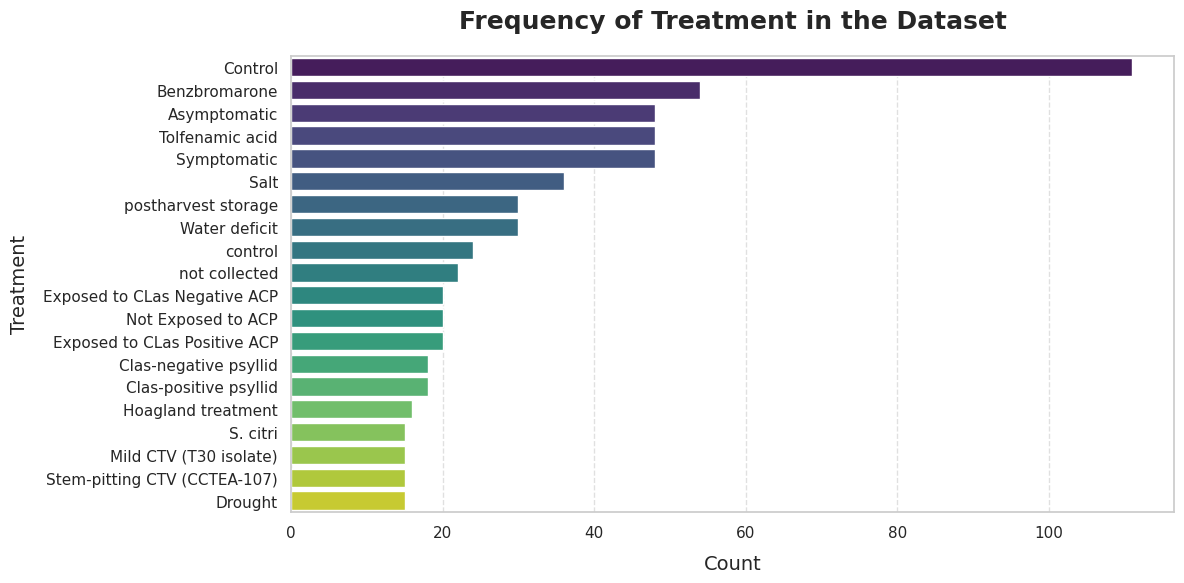

In [24]:
# Treatment
# Treatment Name Frequency - Only the 20 Most Abundant
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 6))

# # Normalize the 'treatment_name' column by stripping whitespace and converting to uppercase
# df['treatment'] = df['treatment'].str.strip().str.upper()
# # Making only the first word uppercase
# df['treatment'] = df['treatment'].str.title()

# Count plot for treatment frequency
sns.countplot(data=df, y='treatment', order=df['treatment'].value_counts().index[:20], palette='viridis')

# Titles and labels
plt.title('Frequency of Treatment in the Dataset', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Count', fontsize=14, labelpad=10)
plt.ylabel('Treatment', fontsize=14, labelpad=10)

# Style ticks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Add grid only on x-axis
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [25]:
# Count values in 'lat_lon' column
lat_lon_counts = df['lat_lon'].value_counts()
df['lat_lon'].isna().sum()
# Count the uniques BioProjects
unique_bioprojects = df['BioProject'].nunique()
print(f'Info for Latitude/Longitude: {df['lat_lon'].isna().sum()}')
print(f'Unique BioProjects: {unique_bioprojects}')

Info for Latitude/Longitude: 5603
Unique BioProjects: 478
